In [3]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
from scipy import stats
import admin_functions as adfn
from sklearn import decomposition
sns.reset_orig()
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload


# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [4]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnraw, p20raw

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILD

# Baseline vs Pre-seizure vs Seizure 
* we want traces that show clear separation of brain states (pre-ictal, ictal, post-ictal)
* if maximum of mean trace is >4x minimum of mean trace - then generalised events occur, pre and post-ictal periods


In [4]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_realtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_realtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_realtrace.npy'))

2


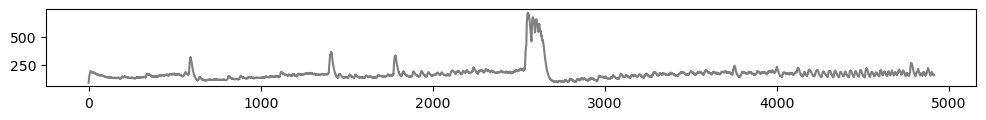

3


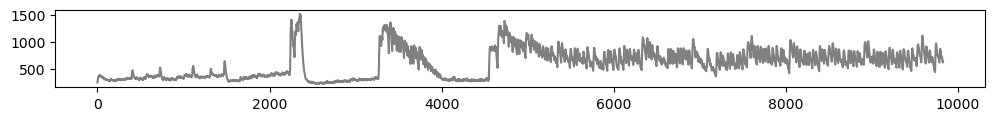

4


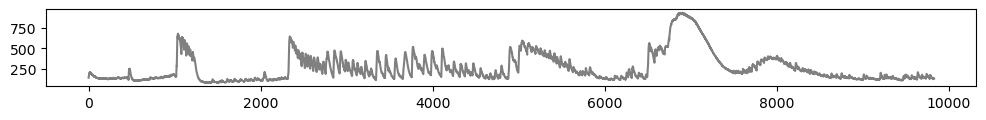

5


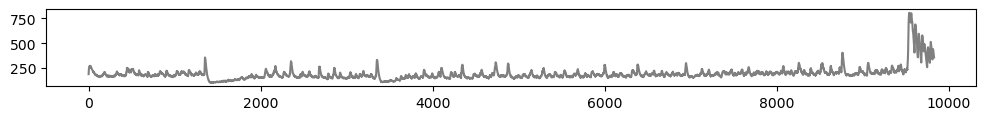

6


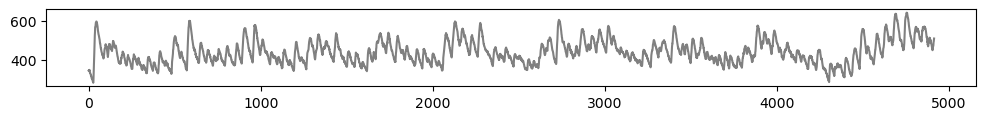

7


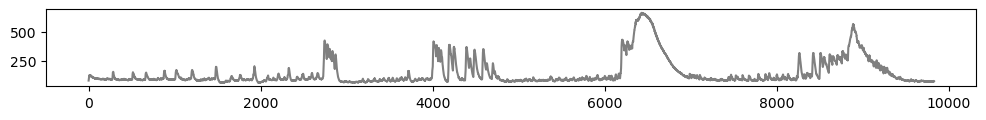

8


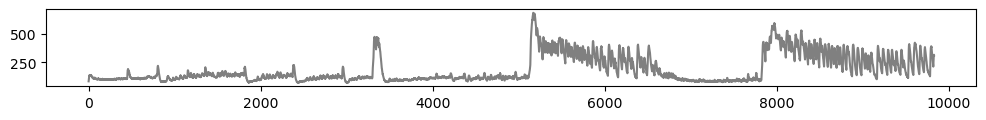

9


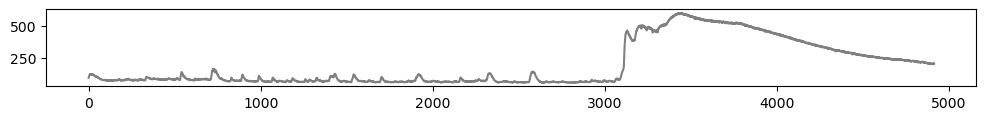

10


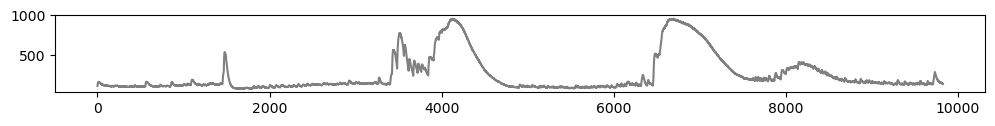

11


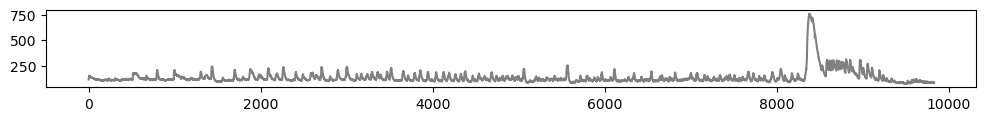

12


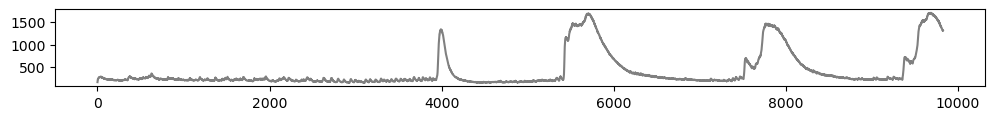

In [6]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    print(str(o + 2))
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    fig, ax = plt.subplots(figsize= (12,1))  
    plt.plot(mean, c='grey')
    gen_list = np.append(gen_list, p20raw[o])
    sub_bln_list = np.append(sub_bln_list, blnraw[o])
    sub_p5_list = np.append(sub_p5_list, p5raw[o])
    plt.show()


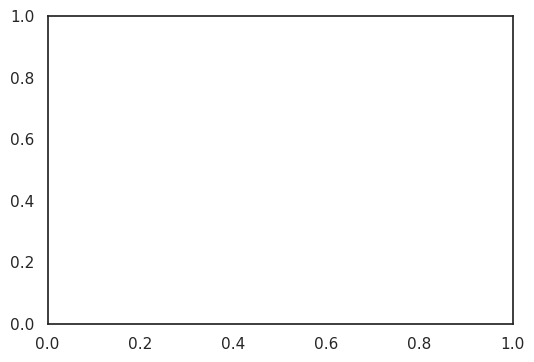

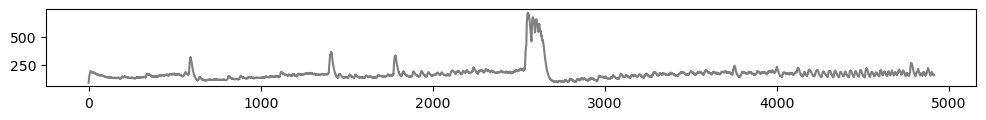

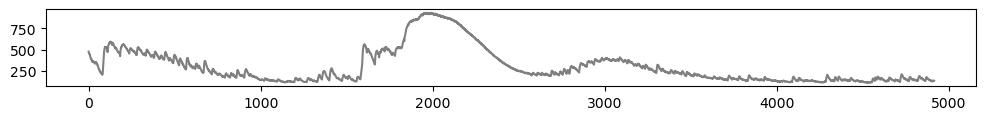

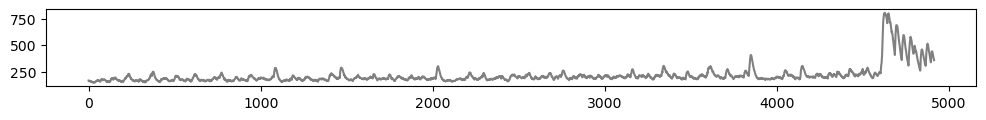

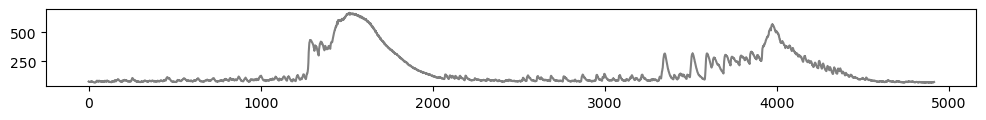

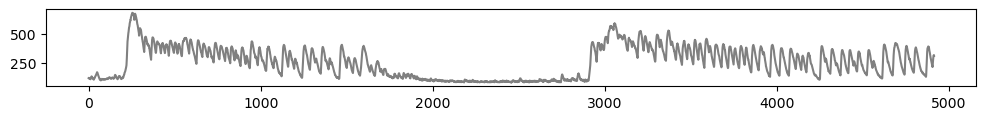

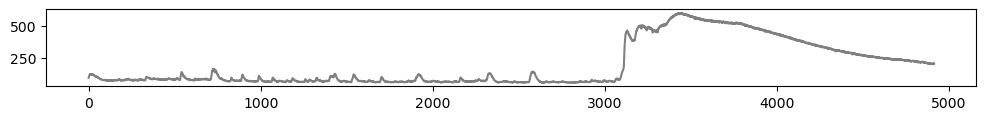

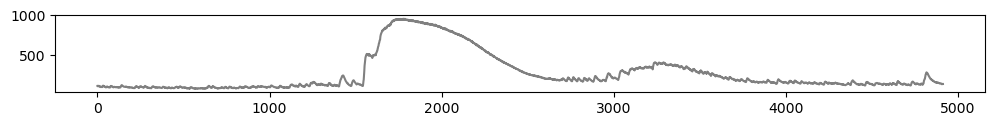

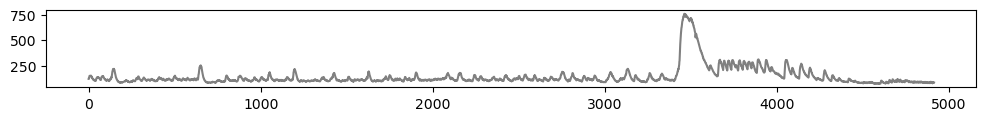

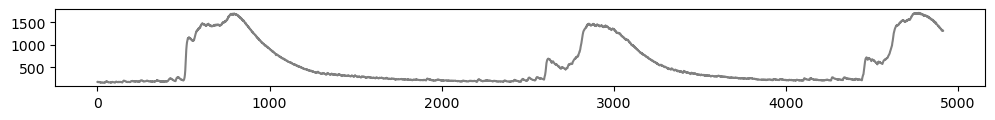

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
       dtype='<U66'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_B

In [87]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    if 4*mini < maxi:
        fig, ax = plt.subplots(figsize= (12,1))  
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, p20raw[o])
        sub_bln_list = np.append(sub_bln_list, blnraw[o])
        sub_p5_list = np.append(sub_p5_list, p5raw[o])
        plt.show()
gen_list, sub_bln_list, sub_p5_list

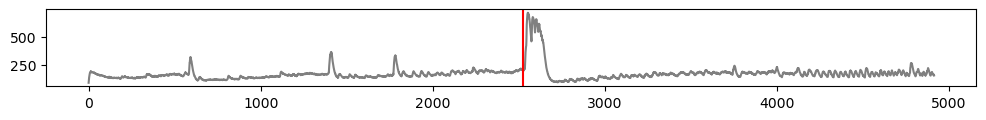

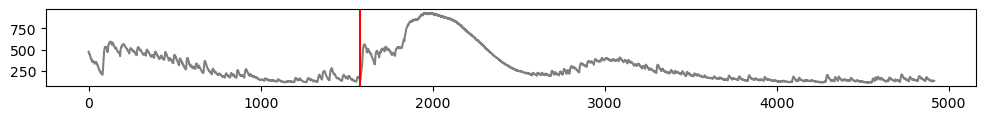

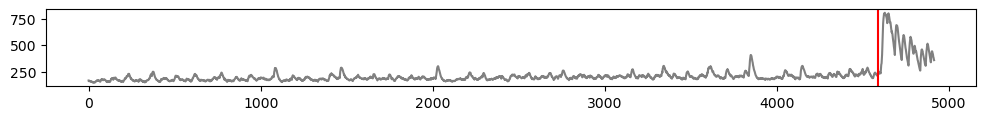

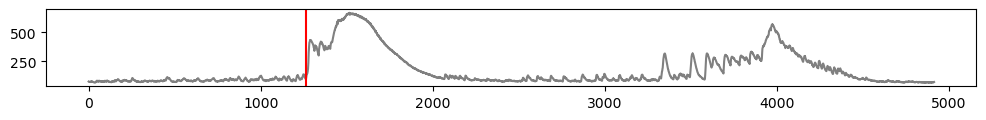

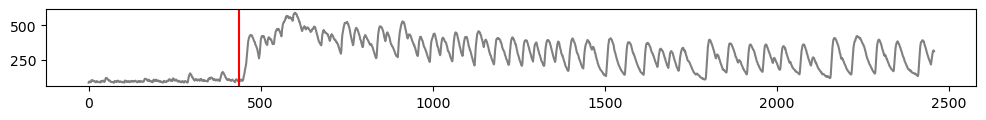

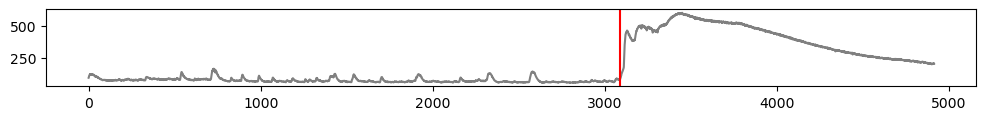

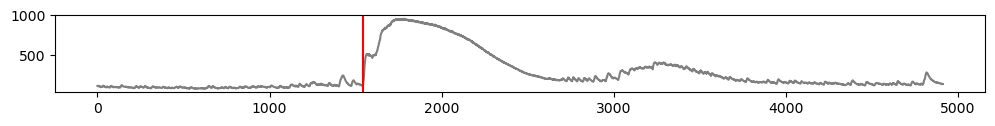

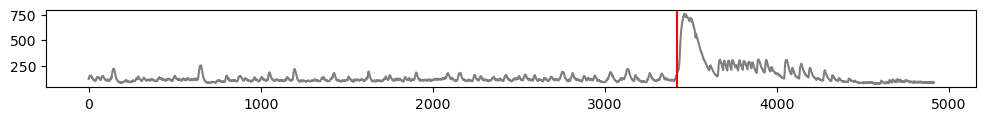

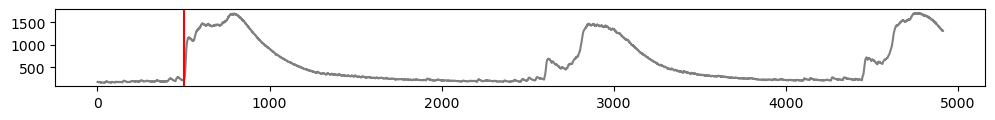

In [88]:
#IDENTIFY GENERALISED EVENT
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    if o == 4:
        mean = mean[np.int(mean.shape[0]/2):]
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (12,1))  
    when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, c = 'grey')
    for x in when: plt.axvline(x=x, c='red')
    max_list[o] = np.where(maxs ==  np.max(maxs))[0]
    plt.show()

In [91]:
#Time series for baseline, preictal, ictal analysis
import random
window = 400
bln_list, bln_blist = list(range(len(gen_list))),list(range(len(gen_list)))
pre_list, pre_blist = list(range(len(gen_list))),list(range(len(gen_list)))
p20_list, p20_blist = list(range(len(gen_list))),list(range(len(gen_list)))

for e in range(len(gen_list)):
    bln_ran = random.randint(0,4914-window)
    bln_list[e] = np.load(sub_bln_list[e])[:,bln_ran:bln_ran+window]
    if e == 4:
        pre_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
    else:
        pre_list[e] = np.load(gen_list[e])[:,max_list[e][0]-window:max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,max_list[e][0]:max_list[e][0]+window]


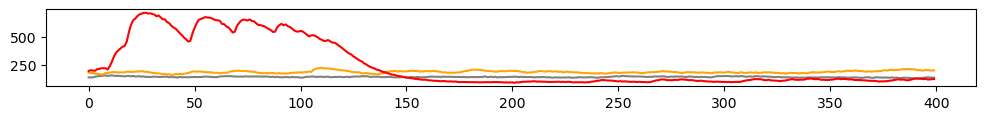

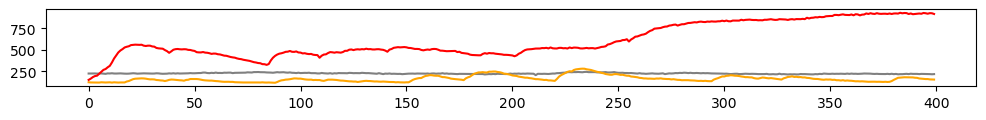

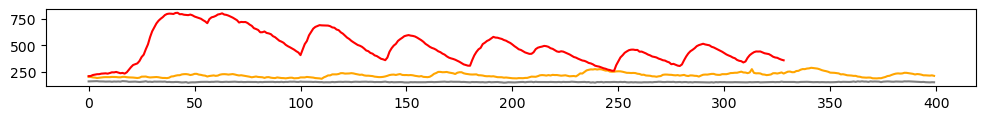

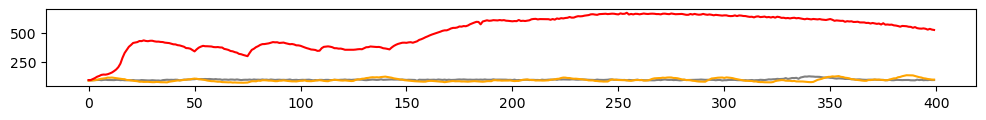

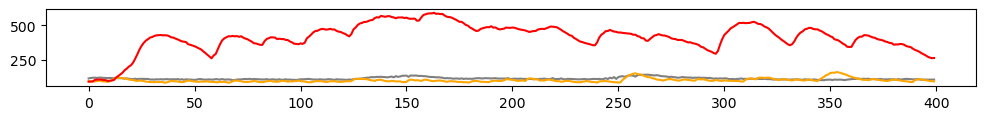

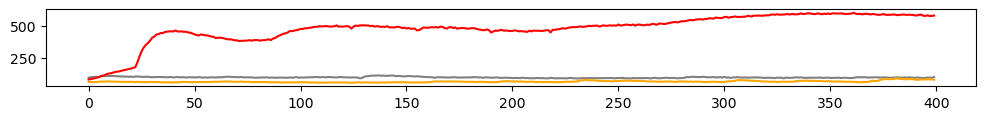

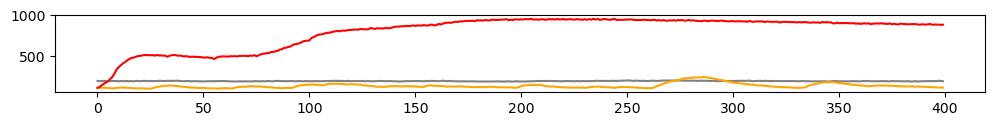

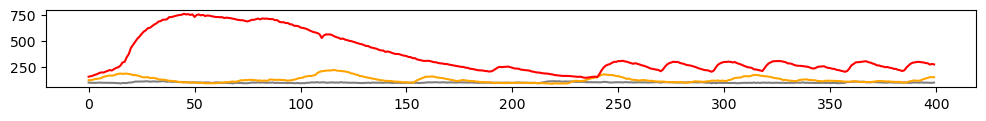

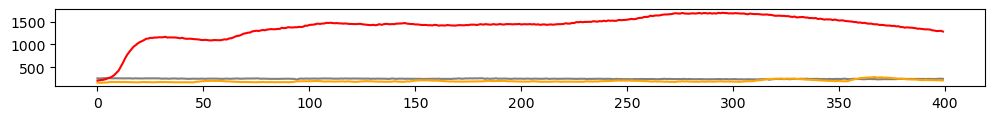

In [92]:
#Check time series
for i in range(len(bln_list)):
    fig, ax = plt.subplots(figsize= (12,1))  
    mean = np.apply_along_axis(np.mean, 0, bln_list[i])
    plt.plot(mean, c='grey')
    mean = np.apply_along_axis(np.mean, 0, pre_list[i])
    plt.plot(mean, c='orange')
    mean = np.apply_along_axis(np.mean, 0, p20_list[i])
    plt.plot(mean, c='red')
    plt.show()

In [ ]:
i = 8
data = np.load(p20raw[i])
fig, ax = plt.subplots(figsize= (20,2))
mean = np.apply_along_axis(np.mean, 0, data)
plt.plot(mean, linewidth = 2, c = 'firebrick')
plt.savefig(Ffig + 'p20_mean.svg', transparent = True)
plt.show()

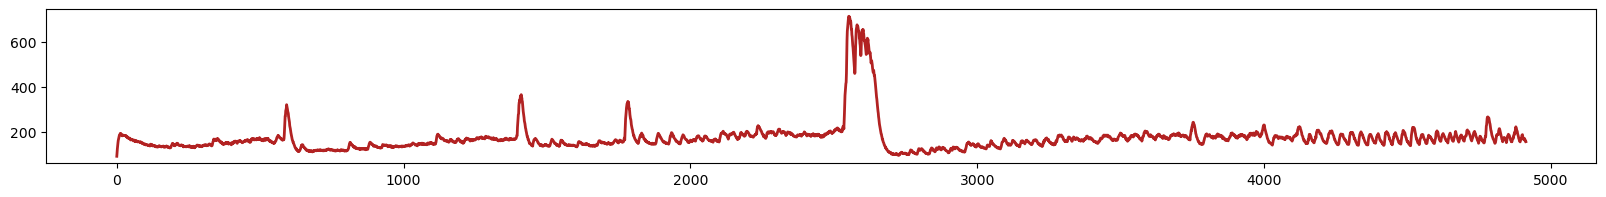

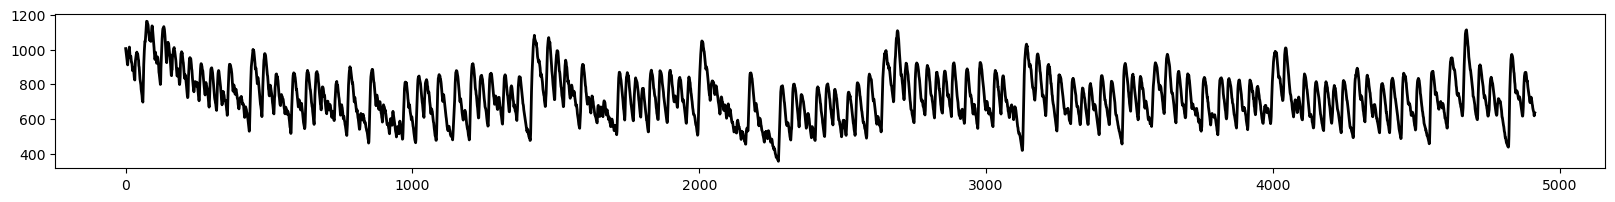

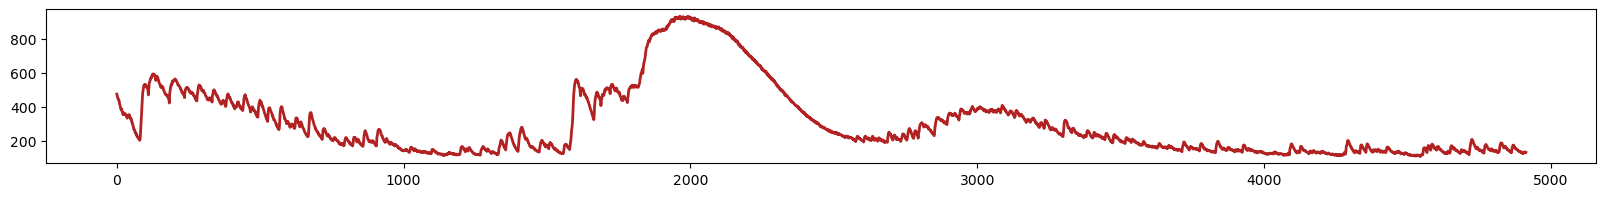

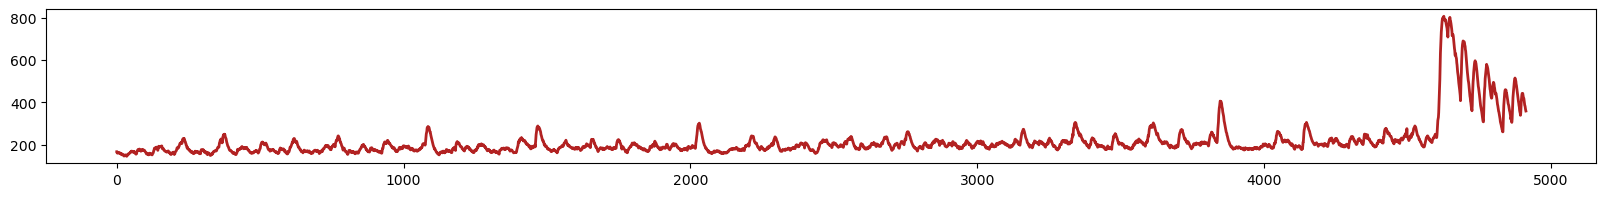

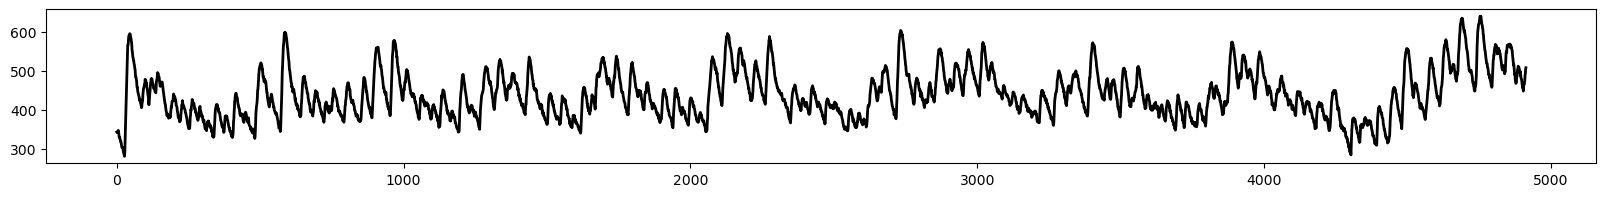

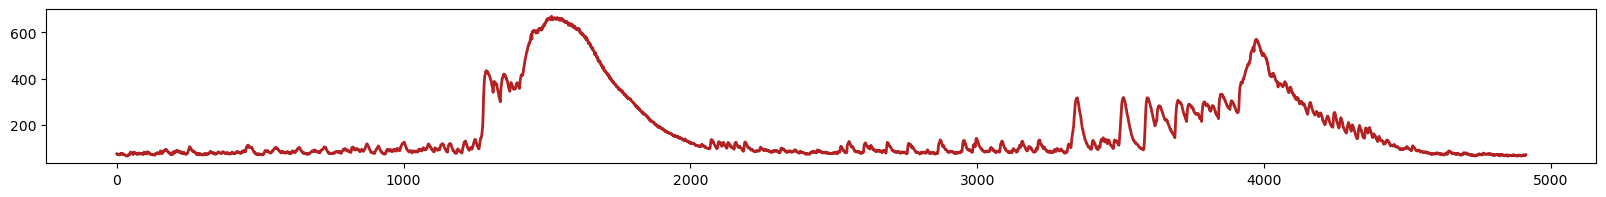

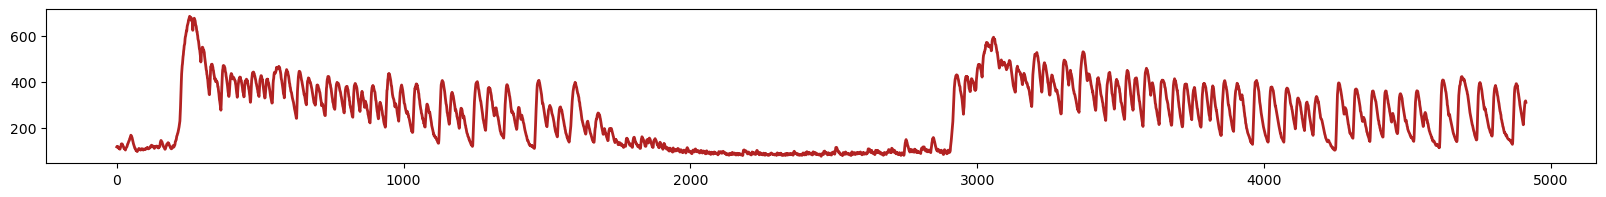

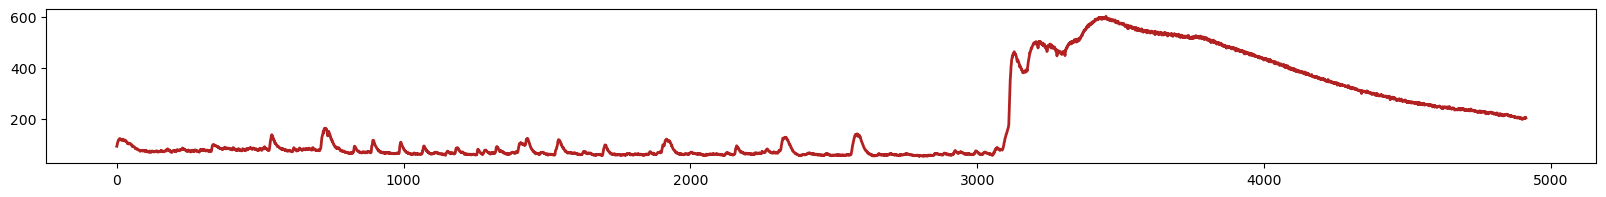

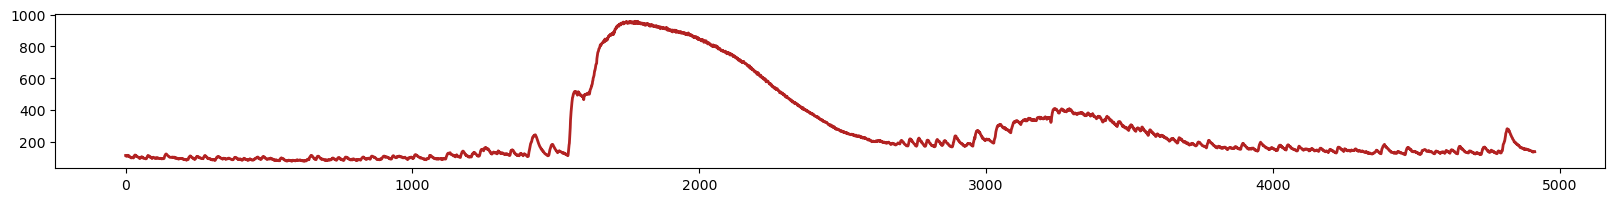

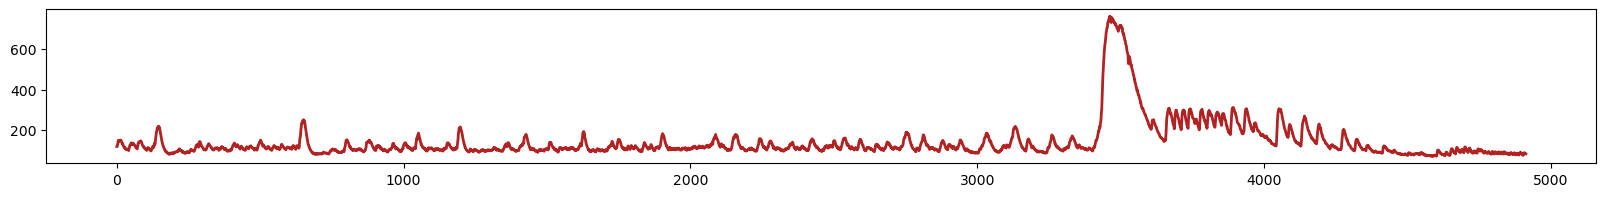

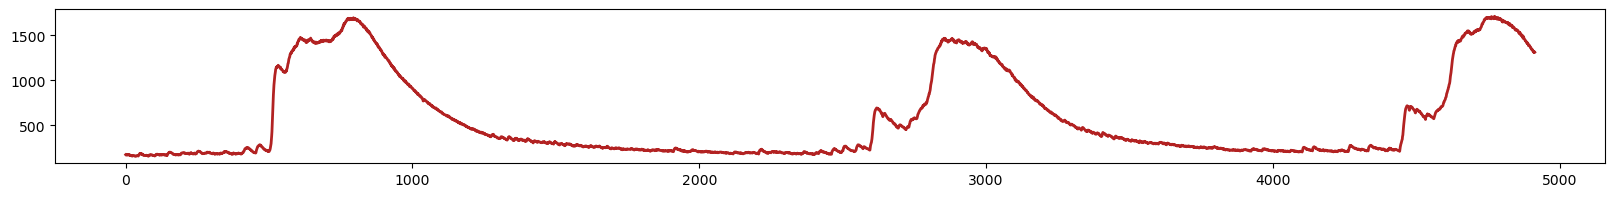

In [17]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    fig, ax = plt.subplots(figsize= (20,2))  
    if o == 1 or o == 4:
        col = 'black'
    else:
        col = 'firebrick'
    plt.plot(mean, linewidth = 2, c= col)
    plt.savefig(Ffig + 'p20_mean-' + str(o) + '.svg', transparent = True)
    #plt.ylim(top = 1600)
    plt.show()


* define generalised events - max amplitude increase in sliding window

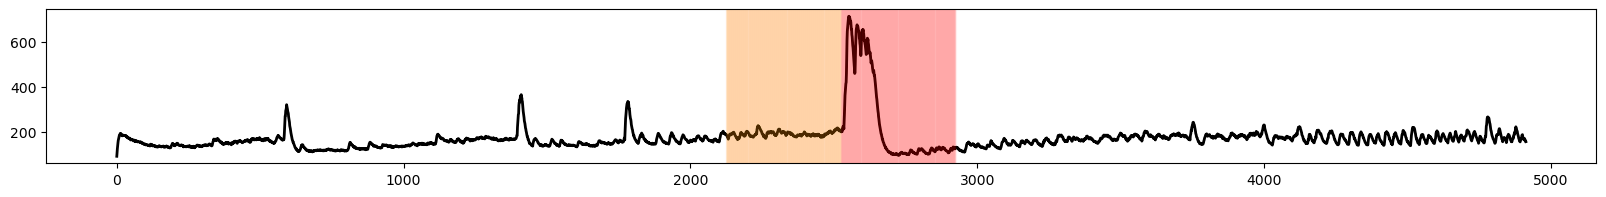

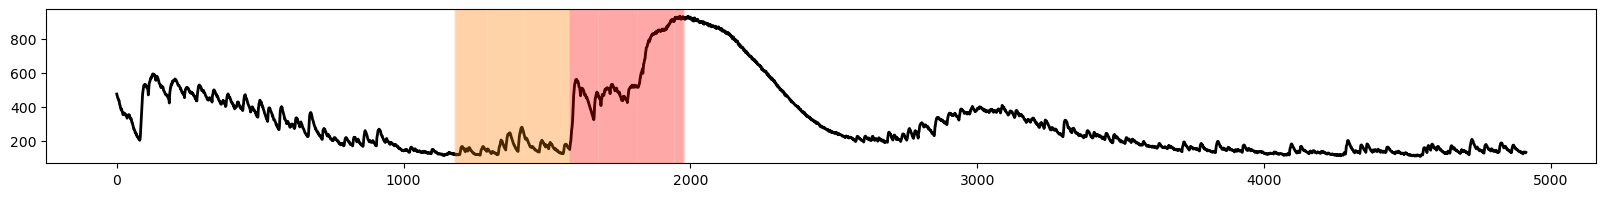

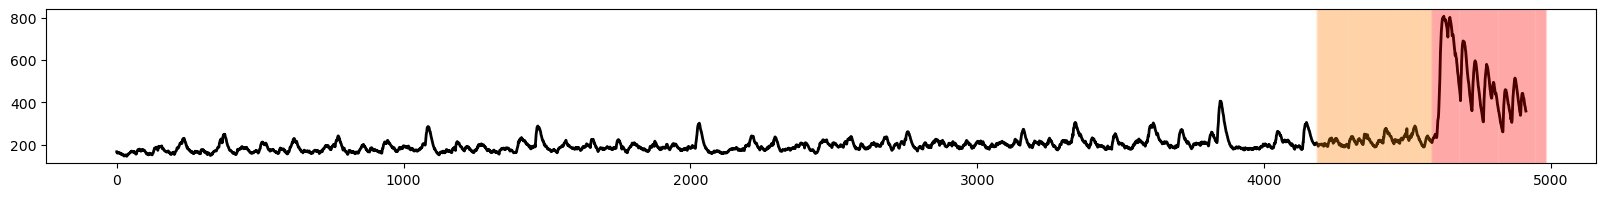

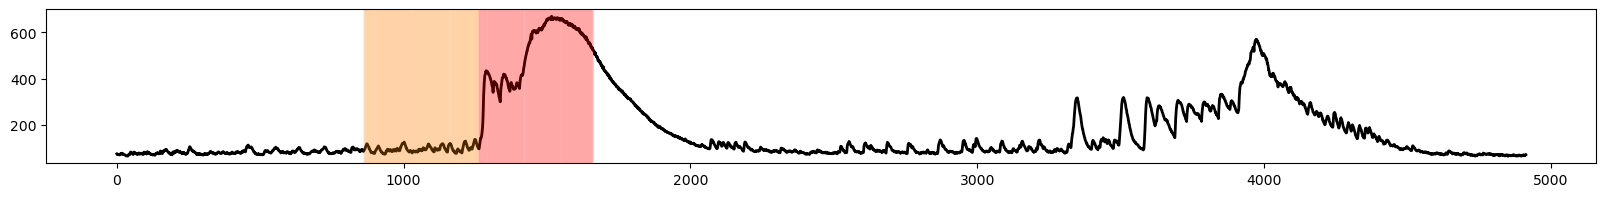

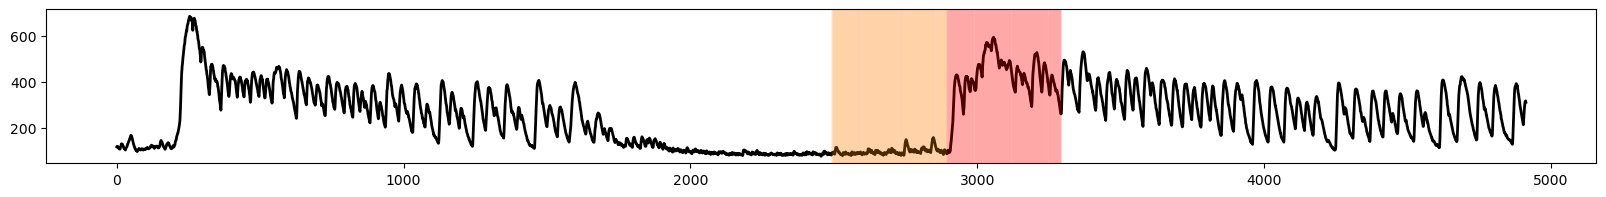

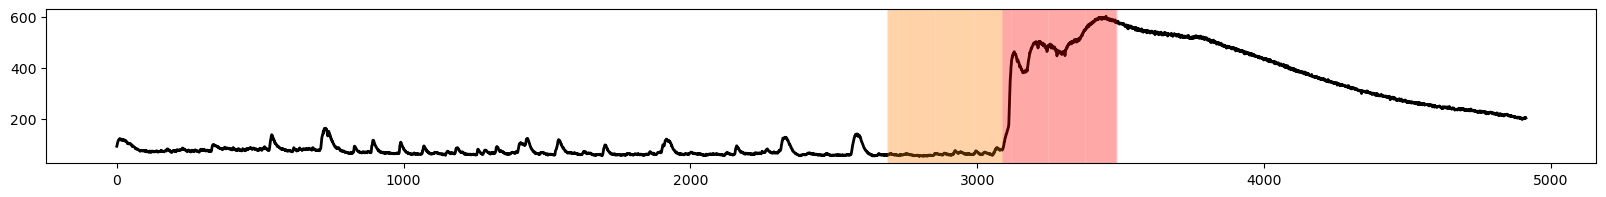

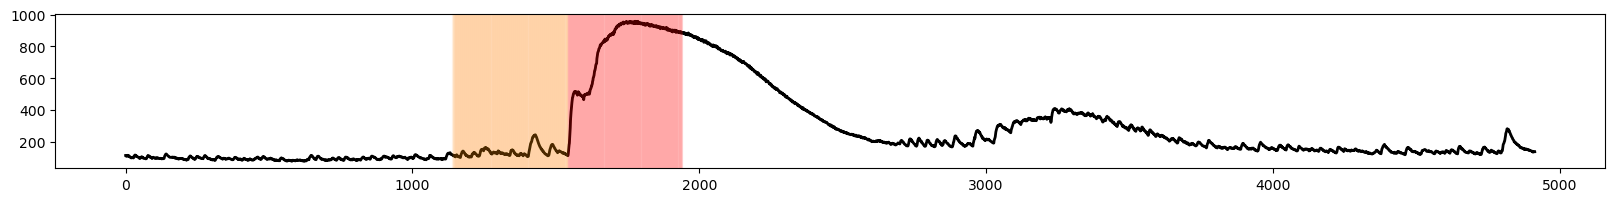

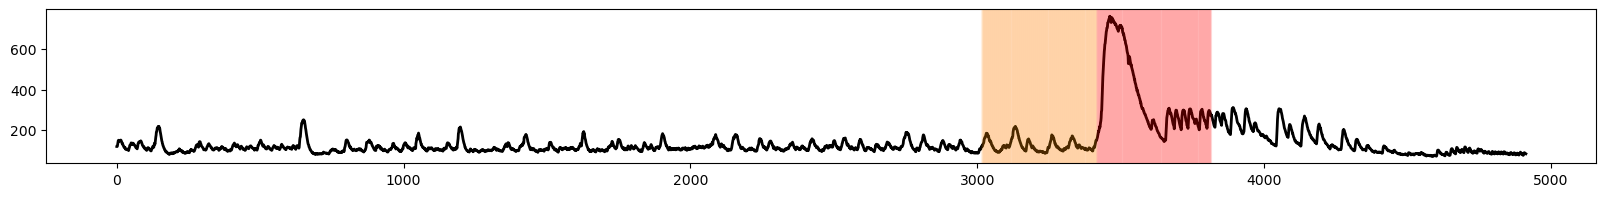

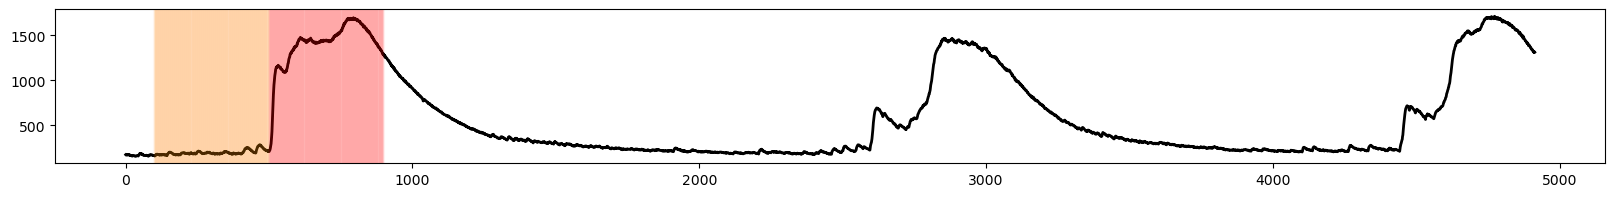

In [39]:
#IDENTIFY GENERALISED EVENT
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    #if o == 4:
    #    mean = mean[np.int(mean.shape[0]/2):]
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (20,2))  
    if o == 4:
        when = (mean.shape[0]/2) + 437
    else:
        when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, linewidth = 2, c= 'k')
    for x in np.arange(when, when+400): plt.axvline(x=x, c='red',alpha = 0.05)
    for x in np.arange(when-400, when): plt.axvline(x=x, c='darkorange',alpha = 0.05)
    plt.savefig(Ffig + 'p20_mean_col-' + str(o) + '.svg', transparent = True)
    plt.show()

In [94]:
#PCA VAR
bln_pcv, pre_pcv, p20_pcv = list(range(len(bln_list))),list(range(len(bln_list))),list(range(len(bln_list)))
for i in range(len(bln_list)):
    b_data,pre_data,p20_data = bln_list[i], pre_list[i], p20_list[i]
    b_components, pre_components, p20_components = b_data.shape[1], pre_data.shape[1], p20_data.shape[1]
    b_pca, pre_pca, p20_pca = decomposition.PCA(b_components) ,decomposition.PCA(pre_components), decomposition.PCA(p20_components) #Define decomposition
    b_fit, pre_fit, p20_fit = b_pca.fit(b_data) ,pre_pca.fit(pre_data),p20_pca.fit(p20_data) 
    bln_pcv[i], pre_pcv[i], p20_pcv[i] = b_fit.explained_variance_ratio_, pre_fit.explained_variance_ratio_, p20_fit.explained_variance_ratio_

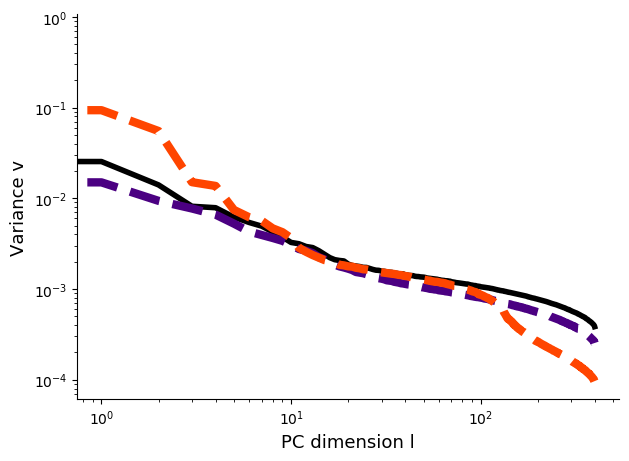

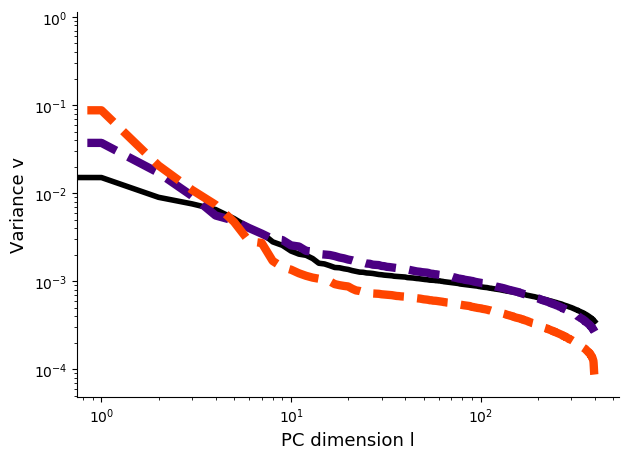

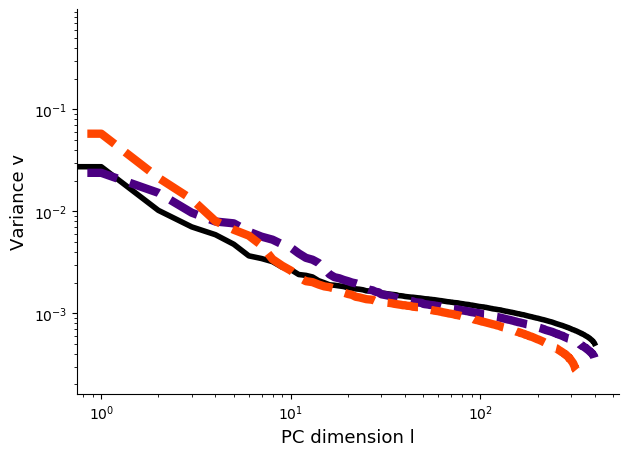

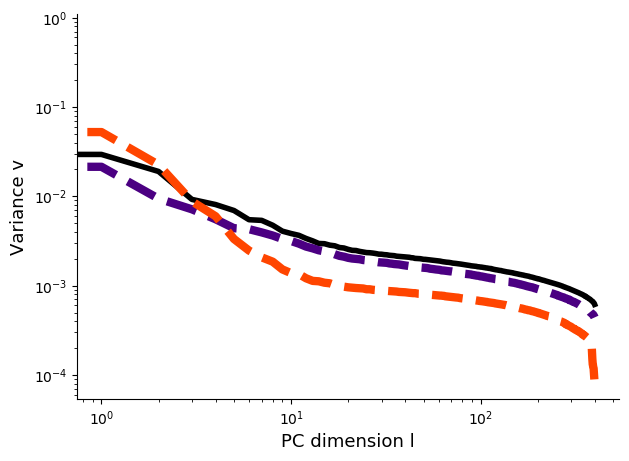

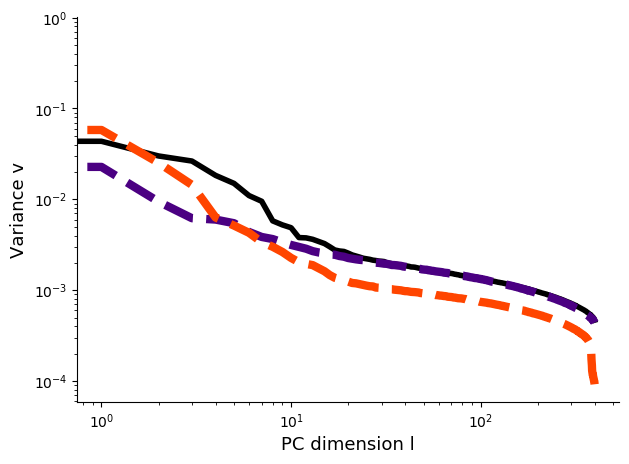

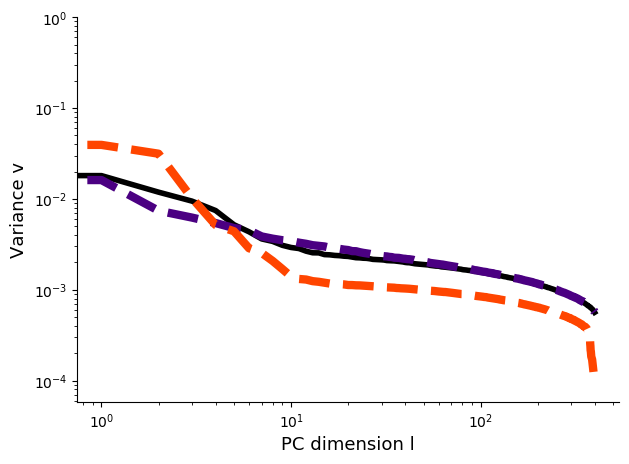

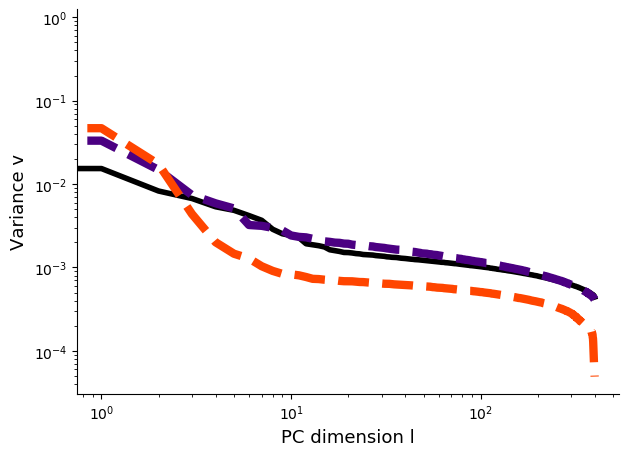

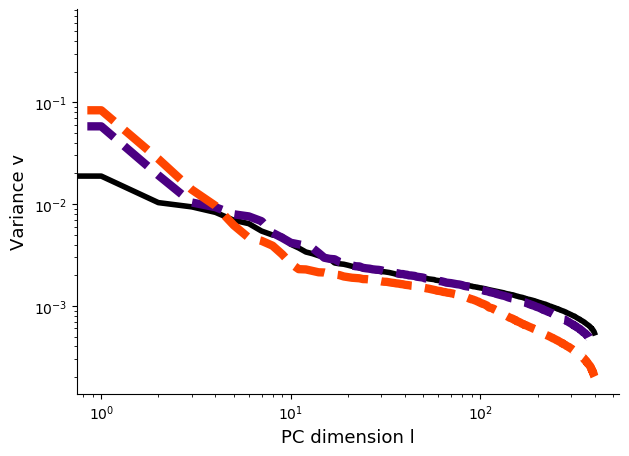

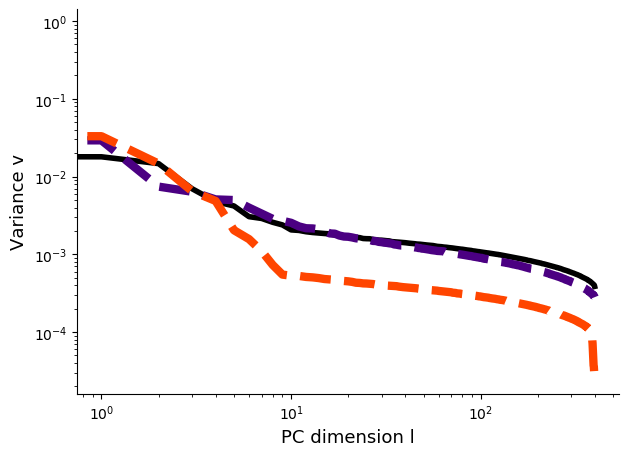

In [95]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
b_slope, pre_slope, p20_slope = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))
b_corr, pre_corr, p20_corr = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']


colors = ['black', 'indigo','orangered']
lines = ['-', '--', '--']
widths = [4, 6, 6]
count=0
for i in range(len(bln_pcv)):
    plotlist = [bln_pcv,pre_pcv,p20_pcv]
    slopelist = [b_slope,pre_slope,p20_slope]
    corrlist = [b_corr, pre_corr, p20_corr]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        data = plotlist[e][i]
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
        y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
        corrlist[e][count] = np.linalg.norm(yaxis[1:]-y_fit[1:]) 
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_ylabel('Variance v', size = '13')
    axarr.set_xlabel('PC dimension l', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    axarr.set_xticklabels(labels)
    plt.savefig(Ffig + 'eigspec_trans' + str(count) + '.svg', transparent = True)
    plt.show()

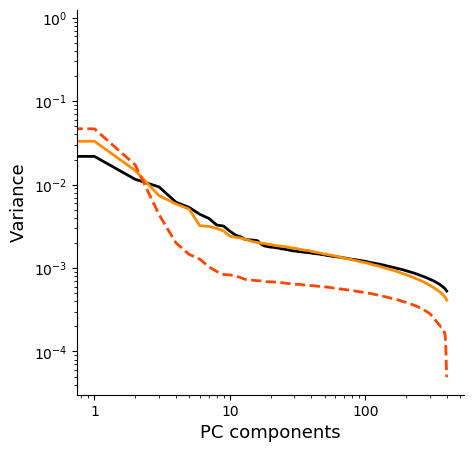

In [17]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
b_slope, pre_slope, p20_slope = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))
b_corr, pre_corr, p20_corr = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))

colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
i = 6
plotlist = [bln_pcv,pre_pcv,p20_pcv]
slopelist = [b_slope,pre_slope,p20_slope]
corrlist = [b_corr, pre_corr, p20_corr]
fig, axarr = plt.subplots(figsize = (5,5))
for e in range(len(plotlist)):
    data = plotlist[e][i]
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    corrlist[e][count] = stats.pearsonr(yaxis[1:], y_fit[1:])[0]
    slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
count+=1
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_eig.svg', transparent = True)
plt.show()

In [96]:
#EXPONENT
import pandas as pd

exp = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

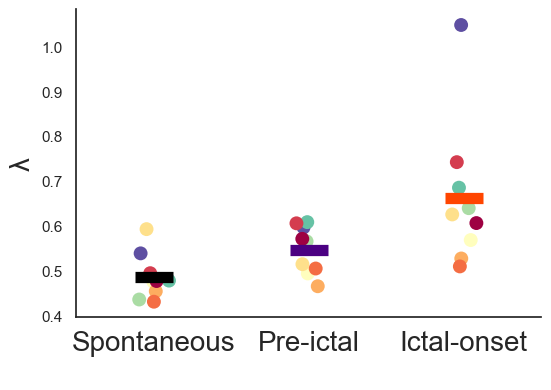

In [97]:
from matplotlib import cm
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnraw)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))

colors2 = ['black', 'indigo','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = new_colors, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('λ', size = '20')
ax.set_xticklabels(['Spontaneous', 'Pre-ictal', 'Ictal-onset'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig(Ffig + 'eig_exp_trans.svg', transparent = True)
plt.show()

In [60]:
bln_exp = exdf[exdf['Labels'] == 'Baseline']
pre_exp = exdf[exdf['Labels'] == 'Pre-ictal']
sz_exp = exdf[exdf['Labels'] == 'Ictal']

cd_list = bln_exp, pre_exp, sz_exp
cd_list

(   Exponent    Labels Fish
 0  0.569483  Baseline   F2
 1  0.468813  Baseline   F3
 2  0.437779  Baseline   F4
 3  0.471127  Baseline   F5
 4  0.499641  Baseline   F6
 5  0.443345  Baseline   F7
 6  0.449061  Baseline   F8
 7  0.512176  Baseline   F9
 8  0.478089  Baseline  F10,
     Exponent     Labels Fish
 9   0.595908  Pre-ictal   F2
 10  0.607766  Pre-ictal   F3
 11  0.564797  Pre-ictal   F4
 12  0.493181  Pre-ictal   F5
 13  0.513879  Pre-ictal   F6
 14  0.464673  Pre-ictal   F7
 15  0.504237  Pre-ictal   F8
 16  0.605100  Pre-ictal   F9
 17  0.570392  Pre-ictal  F10,
     Exponent Labels Fish
 18  1.047722  Ictal   F2
 19  0.684642  Ictal   F3
 20  0.638894  Ictal   F4
 21  0.567758  Ictal   F5
 22  0.624913  Ictal   F6
 23  0.526608  Ictal   F7
 24  0.508921  Ictal   F8
 25  0.741617  Ictal   F9
 26  0.605654  Ictal  F10)

In [31]:
from scipy import stats
data = bln_exp['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.4810571482666773 0.01379867282962946


In [32]:
from scipy import stats
data = pre_exp['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.5466591127115284 0.01784302045407517


In [33]:
from scipy import stats
data = sz_exp['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.660747494314241 0.05417934619547096


In [34]:
for i in range(len(cd_list)):
    p = stats.normaltest(cd_list[i]['Exponent'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)


In [35]:
#BLN - Pre
alpha = 0.05/2

t, p = stats.ttest_rel(bln_exp['Exponent'], pre_exp['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -4.065196817632079   p = 0.0036073531934964764
Samples are significantly different


In [63]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_exp['Exponent'], sz_exp['Exponent'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 0.00390625
Samples are significantly different


In [99]:
#POWER LAW CORRELATION
import pandas as pd

corr = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

eu_df = pd.DataFrame({"Distance":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

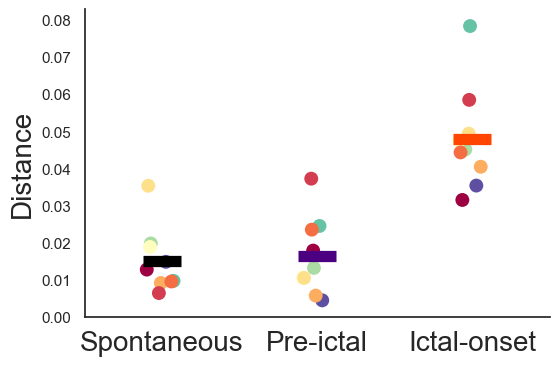

In [100]:
from matplotlib import cm
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnraw)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))

colors2 = ['black', 'indigo','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Distance", data = eu_df, hue = 'Fish', palette = new_colors, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Distance', size = '20')
ax.set_xticklabels(['Spontaneous', 'Pre-ictal', 'Ictal-onset'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig(Ffig + 'eig_eu_trans.svg', transparent = True)
plt.show()

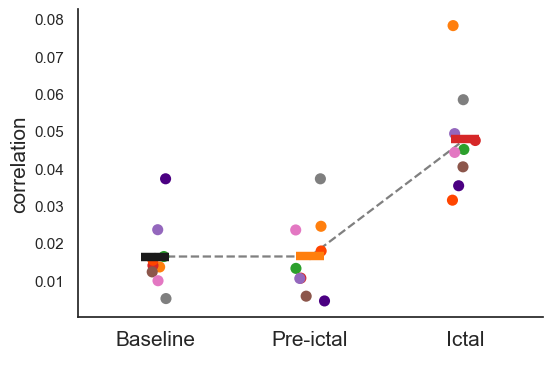

In [20]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['k','#ff7f0e','#d62728']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Distance", data = eu_df, hue = 'Fish', palette = colors1, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('correlation', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig('powerlaw_corrdis.svg', transparent = True)
plt.show()

In [51]:
bln_eu = eu_df[eu_df['Labels'] == 'Baseline']
pre_eu = eu_df[eu_df['Labels'] == 'Pre-ictal']
sz_eu = eu_df[eu_df['Labels'] == 'Ictal']

cd_list = bln_eu, pre_eu, sz_eu
cd_list

(   Distance    Labels Fish
 0  0.023153  Baseline   F2
 1  0.009082  Baseline   F3
 2  0.010379  Baseline   F4
 3  0.016692  Baseline   F5
 4  0.007401  Baseline   F6
 5  0.010444  Baseline   F7
 6  0.014229  Baseline   F8
 7  0.011517  Baseline   F9
 8  0.012522  Baseline  F10,
     Distance     Labels Fish
 9   0.004475  Pre-ictal   F2
 10  0.024490  Pre-ictal   F3
 11  0.013204  Pre-ictal   F4
 12  0.010594  Pre-ictal   F5
 13  0.010501  Pre-ictal   F6
 14  0.005753  Pre-ictal   F7
 15  0.023505  Pre-ictal   F8
 16  0.037221  Pre-ictal   F9
 17  0.017862  Pre-ictal  F10,
     Distance Labels Fish
 18  0.035361  Ictal   F2
 19  0.078296  Ictal   F3
 20  0.045087  Ictal   F4
 21  0.047489  Ictal   F5
 22  0.049338  Ictal   F6
 23  0.040429  Ictal   F7
 24  0.044294  Ictal   F8
 25  0.058430  Ictal   F9
 26  0.031492  Ictal  F10)

In [52]:
from scipy import stats
data = bln_eu['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.012824213808798028 0.0015832310460948244


In [53]:
from scipy import stats
data = pre_eu['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.01640042328355275 0.0035077540431873735


In [54]:
from scipy import stats
data = sz_eu['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.047801657762336976 0.004625017651850756


In [55]:
for i in range(len(cd_list)):
    p = stats.normaltest(cd_list[i]['Distance'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)


In [66]:
#BLN - Pre
alpha = 0.05/2

t, p = stats.ttest_rel(bln_eu['Distance'], pre_eu['Distance'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.8341897469857591   p = 0.42837822384556945
Samples are the same


In [67]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_eu['Distance'], sz_eu['Distance'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 0.00390625
Samples are significantly different


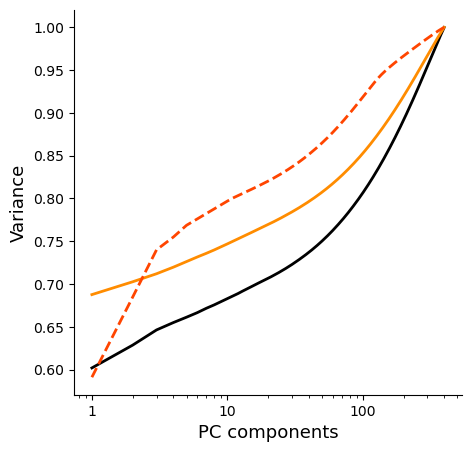

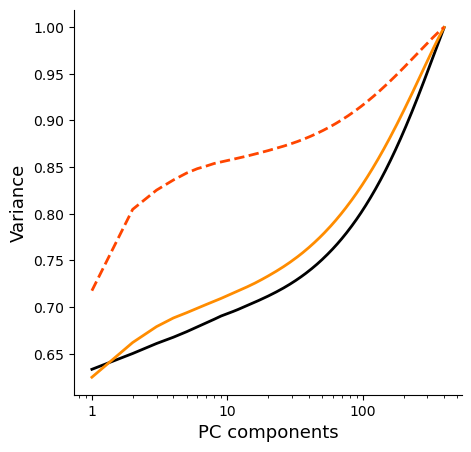

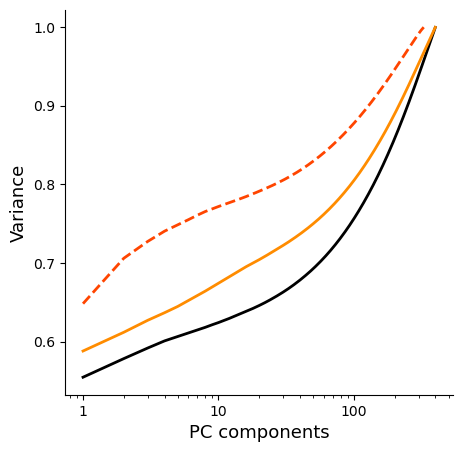

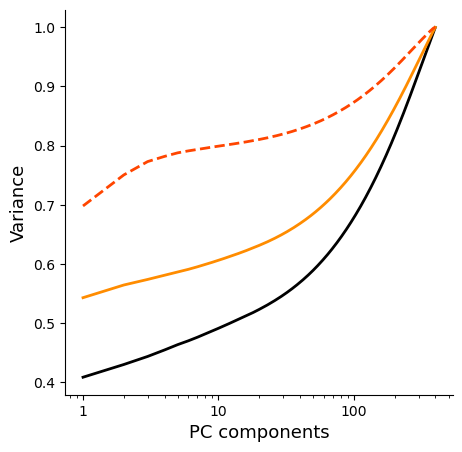

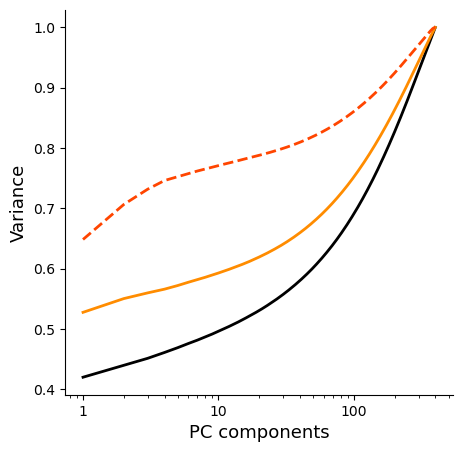

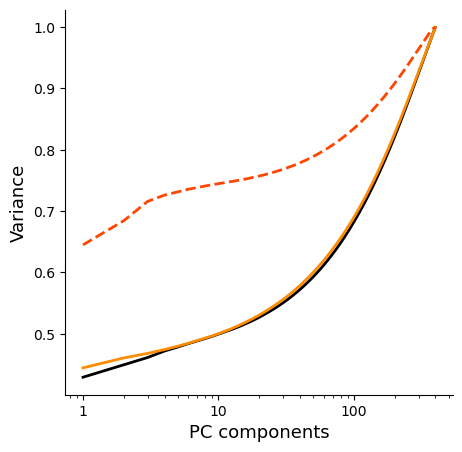

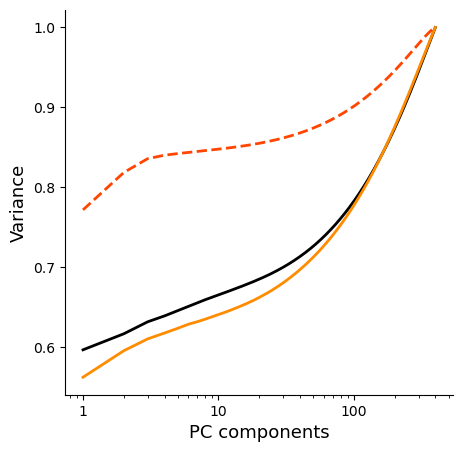

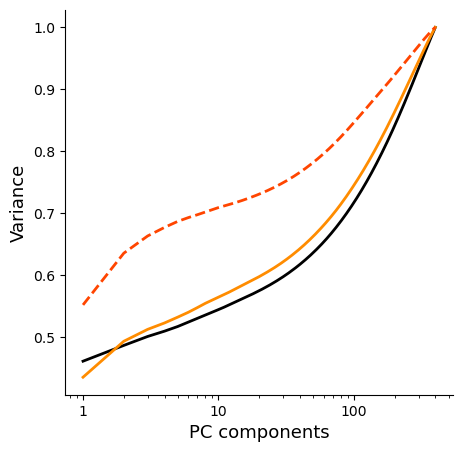

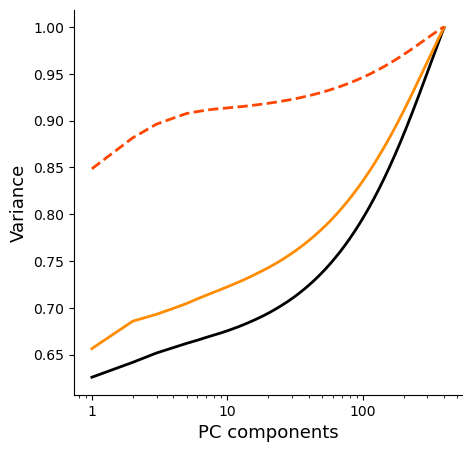

In [33]:
import matplotlib
import powerlaw
sns.reset_orig()

def cumulative(input_vec):
    count = 0
    output_vec = np.zeros(input_vec.shape)
    for i in range(len(input_vec)):
        count = count + input_vec[i]
        output_vec[i] = count
    return(output_vec)

colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
for i in range(len(bln_pcv)):
    plotlist = [bln_pcv,pre_pcv,p20_pcv]
    slopelist = [b_slope,pre_slope,p20_slope]
    fig, axarr = plt.subplots(figsize = (5,5))
    for e in range(len(plotlist)):
        data = plotlist[e][i]
        xaxis = np.linspace(1,np.shape(data)[0], num = np.shape(data)[0])
        yaxis = cumulative(data)
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
    count+=1
    axarr.set_xscale('log')
    #axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

# State transition - manifold smoothness
* Show dynamic reorganisation of population responses throughout seizure block - different state transitions
* suggests changes to dimensionality/connectivity throughout entire period

In [1]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
p5pcv = sorted(glob.glob('*PTZ05*pcavar.npy'))
p20pcv = sorted(glob.glob('*PTZ20*pcavar.npy'))
blnraw

NameError: name 'os' is not defined

In [115]:
## Functions 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

def rand_project(n_samples, n_features, n_components, alpha, theta):
    W = np.random.randn(n_components, n_features) #weight matrix - entirely random - 3 PCs
    X = np.zeros((n_features, n_samples)) #x matrix - features x samples

    for n in range(1, (n_features//2)):
        X[(2*n)-1,:] = np.cos(theta*n)/n**(alpha/2) 
        X[(2*n), :] = np.sin(theta*n)/n**(alpha/2) 

    #for n in range(1, (n_features)):
    #  X[n] = np.sin(n*theta)/n**(alpha/2)


    wproj = W @ X
    return(wproj, W, X)

def eigenspec(scores):
    var_vec = np.zeros(len(scores))
    for i in range(len(scores)):
        var_vec[i] = np.var(scores[i])
        eigvar = np.zeros(len(scores))  
    for i in range(len(scores)):
        eigvar[i] = var_vec[i]/np.sum(var_vec)

    return(eigvar)


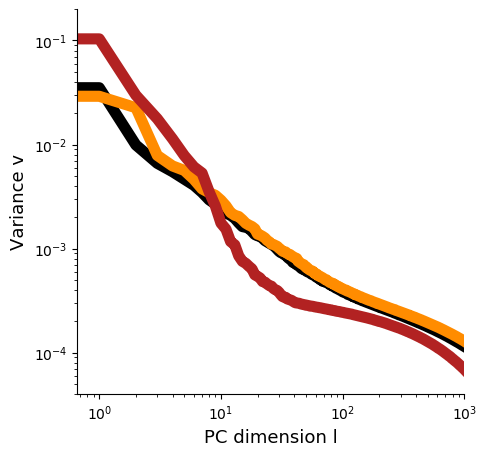

In [304]:
import matplotlib
import powerlaw
from sklearn import decomposition

sns.reset_orig()
num1 = adfn.name_zero('front',10,10,1)
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']


blnslope, p5slope, p20slope = list(range(11)), list(range(11)), list(range(11))
blncorr, precorr, p20corr = list(range(11)), list(range(11)), list(range(11))

colors = ['black', 'darkorange','firebrick']
lines = ['-', '-', '-']
widths = [8, 8, 8]

count=0
for x,i in enumerate(num1):
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_pcavar.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_pcavar.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_pcavar.npy*'))
    plotlist = [blnlist,p5list,p20list]
    slopelist = [blnslope,p5slope,p20slope]
    corrlist = [blncorr,precorr,p20corr]
    fig, axarr = plt.subplots(figsize = (5,5))
    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
        m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
        y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
        corrlist[e][count] = np.linalg.norm(yaxis[1:]-y_fit[1:]) #stats.pearsonr(yaxis[1:], y_fit)[0]
        
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_ylabel('Variance v', size = '13')
    axarr.set_xlabel('PC dimension l', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.xlim(0, 1000)
    plt.ylim(0.00004, 0.2)
    axarr.set_xticklabels(labels)
    plt.savefig(Ffig + 'eig_exp_single.svg', transparent = True)

    plt.show()

In [164]:
## Functions 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

def rand_project(n_samples, n_features, n_components, alpha, theta):
    W = np.random.randn(n_components, n_features) #weight matrix - entirely random - 3 PCs
    X = np.zeros((n_features, n_samples)) #x matrix - features x samples

    for n in range(1, (n_features//2)):
        X[(2*n)-1,:] = np.cos(theta*n)/n**(alpha/2) 
        X[(2*n), :] = np.sin(theta*n)/n**(alpha/2) 

    #for n in range(1, (n_features)):
    #  X[n] = np.sin(n*theta)/n**(alpha/2)


    wproj = W @ X
    return(wproj, W, X)

def eigenspec(scores):
    var_vec = np.zeros(len(scores))
    for i in range(len(scores)):
        var_vec[i] = np.var(scores[i])
        eigvar = np.zeros(len(scores))  
    for i in range(len(scores)):
        eigvar[i] = var_vec[i]/np.sum(var_vec)

    return(eigvar)


In [165]:
#Calculate projections for different exponents
n_samples = 4914
theta =   np.linspace(0,50, n_samples)#np.linspace(0,,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 1000
n_components = 4
alp = [1.5, 2.0, 2.5] 

proj_list = list(range(len(alp)))
W_list = list(range(len(alp)))
X_list = list(range(len(alp)))

for i in range(len(alp)):
    proj_list[i], W_list[i], X_list[i] = rand_project(n_samples, n_features, n_components, alp[i], theta)

In [154]:
2**12

4096

In [150]:
#Calculate projections for different exponents
n_samples = 2**12 
theta = np.linspace(0,2*,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 1000
n_components = 4
alp = [1.5, 2.0, 2.5] 

proj_list = list(range(len(alp)))
W_list = list(range(len(alp)))
X_list = list(range(len(alp)))

for i in range(len(alp)):
    proj_list[i], W_list[i], X_list[i] = rand_project(n_samples, n_features, n_components, alp[i], theta)

1.4941785781211465
1.9922369313121386
2.490295284503134


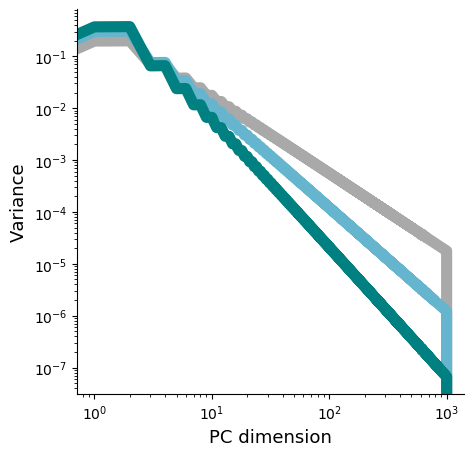

In [305]:
#Plot eigenspectrum
col = ['darkgray', 'c', 'teal']
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']

fig, axarr = plt.subplots(figsize = (5,5))

for i in range(len(alp)):
    data = eigenspec(X_list[i])
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 8, markersize = 1, alpha = 1, color = col[i])
    slope = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][10:-2]),np.log10(yaxis[:len(xaxis)-1][10:-2]))[0]
    print(slope)
axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.set_title(slope)
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
plt.savefig(Ffig + 'eig_exp_randproj.svg', transparent = True)
plt.show()  

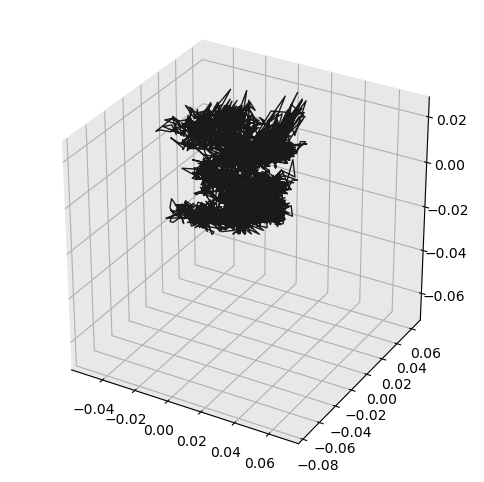

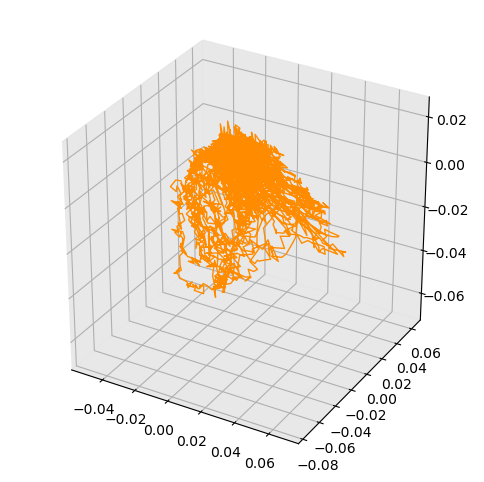

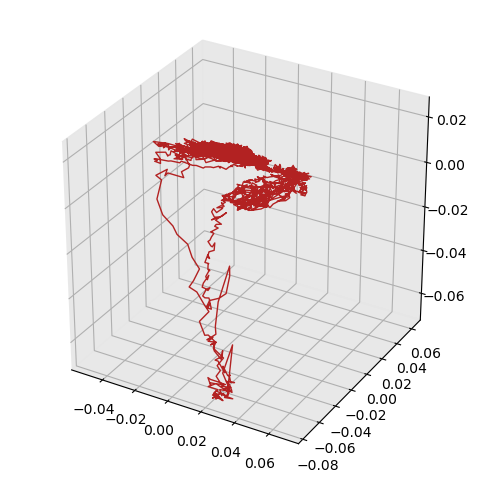

In [177]:
colors = ['k','darkorange','firebrick']

i, n_components = 9, 4
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])
plotlist = bln, p5, p20
x,y,z, = [],[],[]

for i in range(len(plotlist)):
    pca = decomposition.PCA(n_components)
    fit = pca.fit(plotlist[i]) 
    x = np.append(fit.components_[3,:], x)
    y = np.append(fit.components_[2,:], y)
    z = np.append(fit.components_[1,:], z)
xmax, xmin = np.max(x), np.min(x)
ymax, ymin = np.max(y), np.min(y)
zmax, zmin = np.max(z), np.min(z)

namelist = ['bln', 'interictal', 'ictal']
for i in range(len(plotlist)):
    pca = decomposition.PCA(n_components)
    fit = pca.fit(plotlist[i])
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (6,6))
    ax = fig.add_subplot(projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], colors[i], linewidth = 1)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.set_zlim(zmin, zmax)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.savefig(Ffig + 'eig_manifold-'  + str(namelist[i]) + ' .svg', transparent = True)
    #plt.zlim(zmin, zmax)
    plt.show()

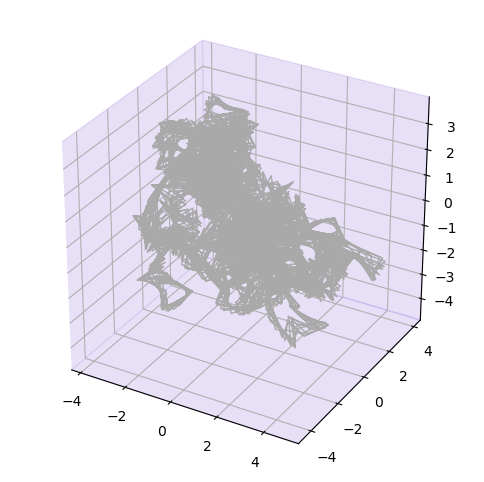

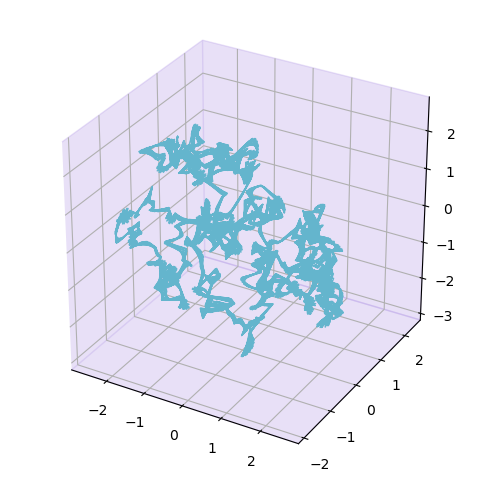

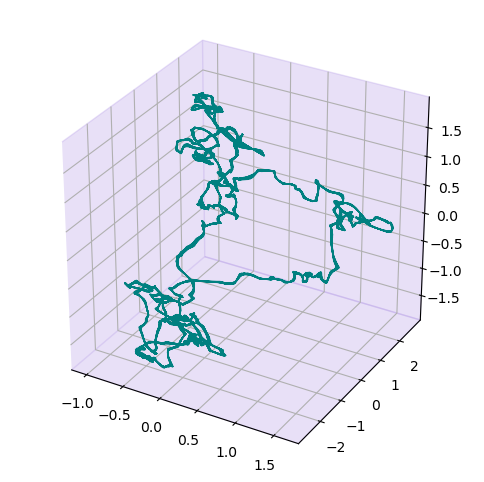

In [269]:
col = ['darkgray', 'c', 'teal']
#plot random projection


for i in range(len(alp)):
    fig = plt.figure(figsize= (6,6))
    ax = fig.add_subplot(projection='3d')
    dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
    ax.w_xaxis.set_pane_color((0.7, 0.6, 0.9, 0.3))
    ax.w_yaxis.set_pane_color((0.7, 0.6, 0.9, 0.3))
    ax.w_zaxis.set_pane_color((0.7, 0.6, 0.9, 0.3))
    #ax.set_title(alp[i])
    plt.savefig(Ffig + 'eig_randproj-' + str(i) + '.svg', transparent = True)
    plt.show()


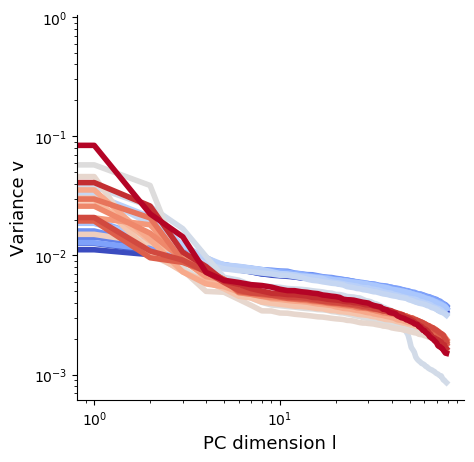

In [82]:
#CHOOSE FISH
#choose = 3
#data = np.load(gen_list[choose])
#mean = np.apply_along_axis(np.mean, 0, data)
#window = adfn.window(100, mean.shape[0])[0]
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']


#CALCULATE EIGENSPECTRUM FOR SEGMENTS
count,count1=0,0
for e in range(np.int(mean.shape[0]/window)):
    sub_data = data[:,count:count+window]
    n_components = sub_data.shape[1]
    pca = decomposition.PCA(n_components)
    fit = pca.fit(sub_data)
    data_list[count1] = fit.explained_variance_ratio_

    count+=window
    count1+=1

import matplotlib
import sys
from scipy import stats
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,len(data_list))))
fig, axarr = plt.subplots(figsize = (5,5))
for i in range(len(data_list)):
    xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
    yaxis = data_list[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = , markersize = 2, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance v', size = '13')
axarr.set_xlabel('PC dimension l', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
plt.savefig(Ffig + 'eig_dynamic.svg', transparent = True)

plt.show()

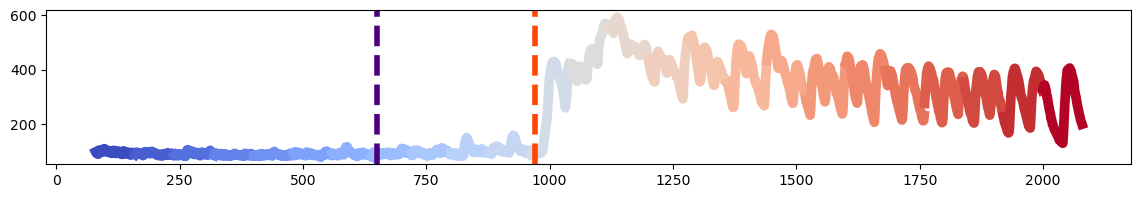

In [73]:
choose = 4
data = np.load(gen_list[choose])[:,2000:4000]
mean = np.apply_along_axis(np.mean, 0, data)
window = adfn.window(52, mean.shape[0])[0]
data_list = list(range((np.int(mean.shape[0]/window))))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,len(data_list))))
fig, axarr = plt.subplots(figsize= (14,2))
count,count1=0,0
for e in range(np.int(mean.shape[0]/window)):
    sub_mean = mean[count:count+window]
    #n_components = sub_data.shape[1]
    #pca = decomposition.PCA(n_components)
    #fit = pca.fit(sub_data)
    #data_list[count1] = fit.explained_variance_ratio_

    count+=window
    xvals = np.arange(count, count+window)
    axarr.plot(xvals, sub_mean, linewidth = 7)


for x in [650]: plt.axvline(x=x, c='indigo', linewidth = 4, linestyle= '--')
for x in [1050]: plt.axvline(x=x-window, c='orangered', linewidth = 4, linestyle= '--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(Ffig + 'eig_mean_trans.svg', transparent = True)
plt.show()


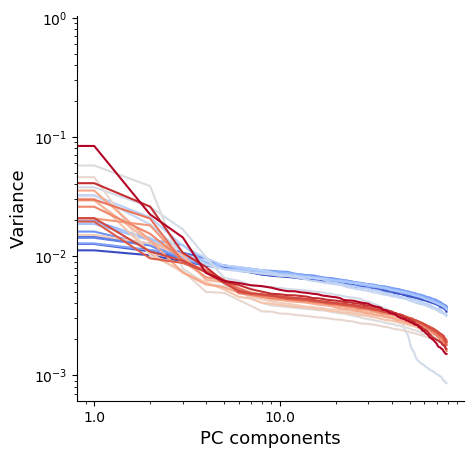

In [16]:
#CHOOSE FISH
#choose = 3
#data = np.load(gen_list[choose])
#mean = np.apply_along_axis(np.mean, 0, data)
#window = adfn.window(100, mean.shape[0])[0]

#CALCULATE EIGENSPECTRUM FOR SEGMENTS
count,count1=0,0
data_list = list(range((np.int(mean.shape[0]/window))))
for e in range(np.int(mean.shape[0]/window)):
    sub_data = data[:,count:count+window]
    n_components = sub_data.shape[1]
    pca = decomposition.PCA(n_components)
    fit = pca.fit(sub_data)
    data_list[count1] = fit.explained_variance_ratio_

    count+=window
    count1+=1

import matplotlib
import sys
from scipy import stats
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,len(data_list))))
fig, axarr = plt.subplots(figsize = (5,5))
for i in range(len(data_list)):
    xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
    yaxis = data_list[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 2, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('dim_dynamic.svg', transparent = True)

plt.show()

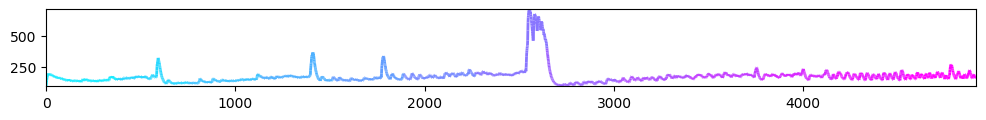

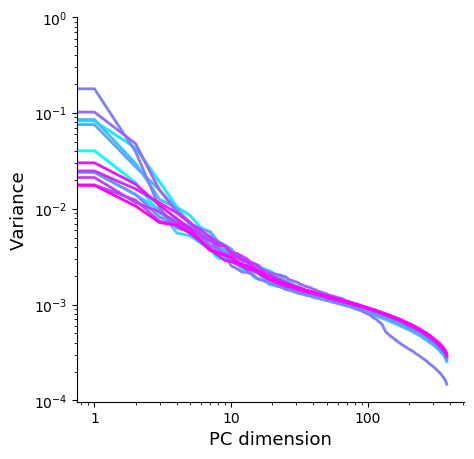

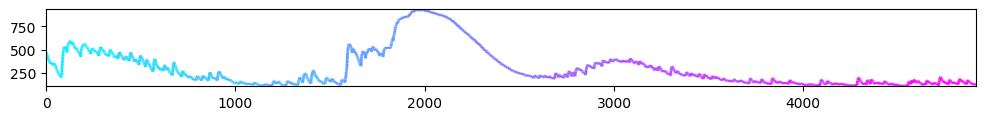

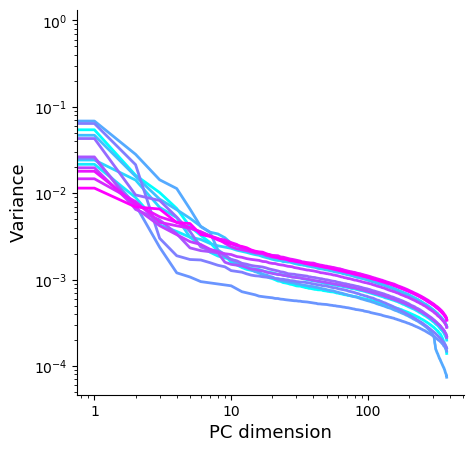

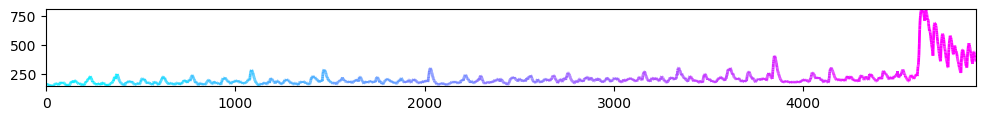

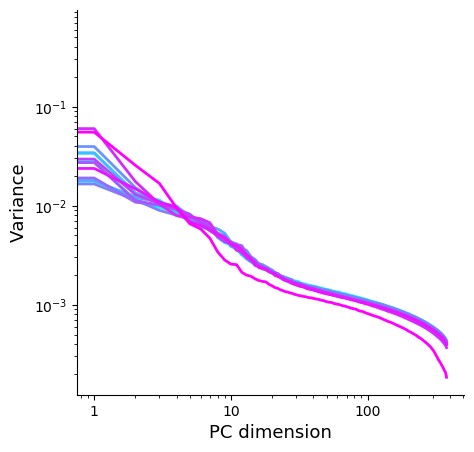

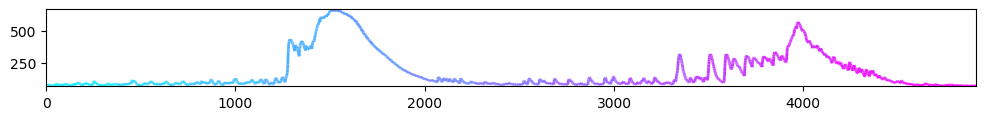

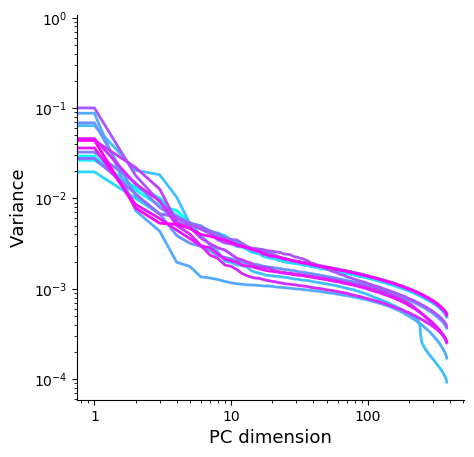

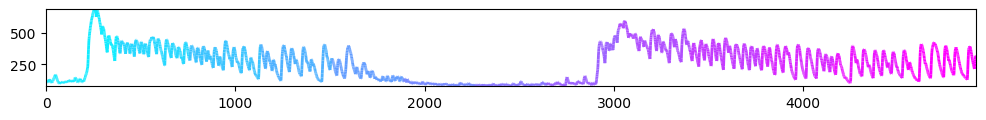

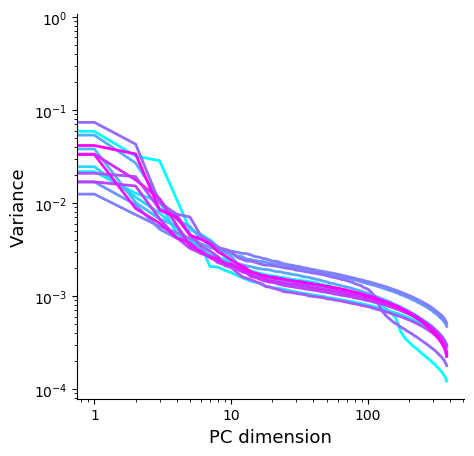

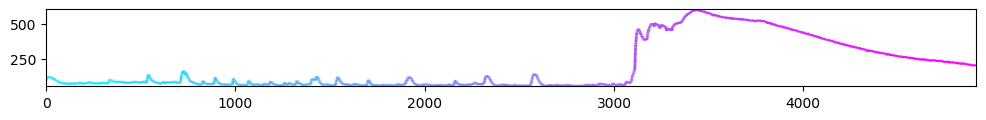

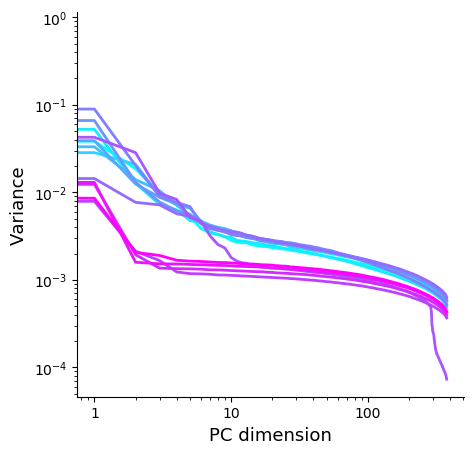

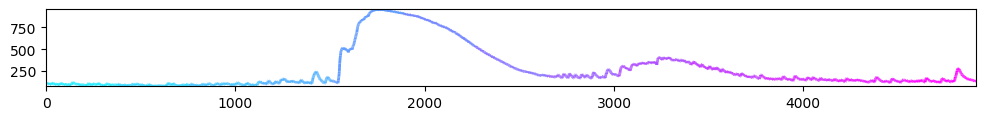

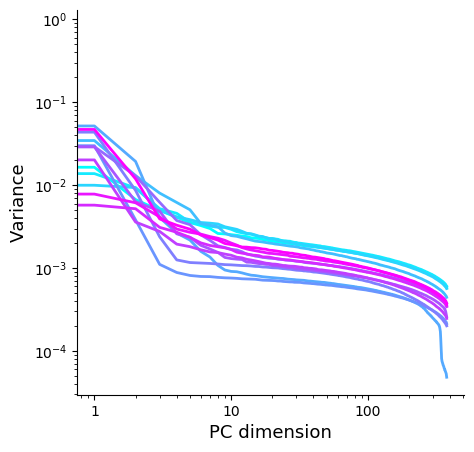

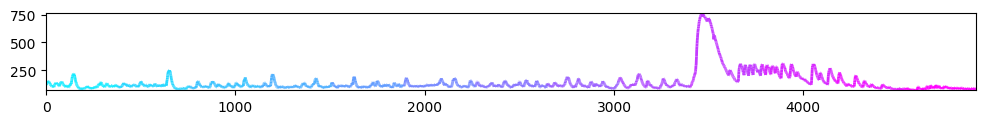

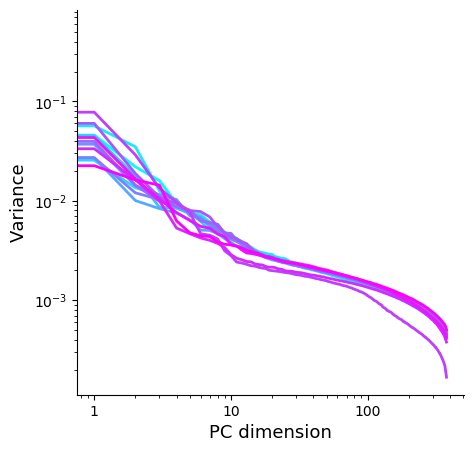

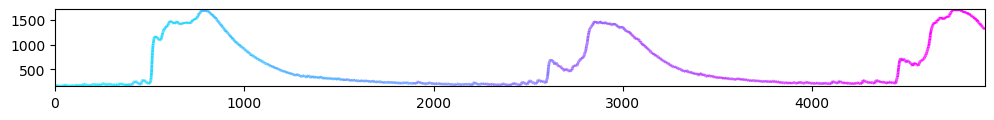

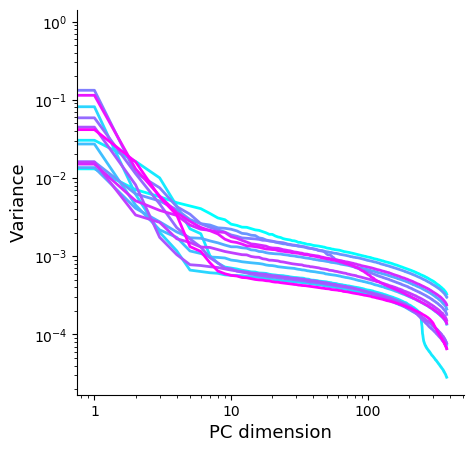

In [37]:
for o in range(len(gen_list)):
    choose = o
    data = np.load(gen_list[choose])
    mean = np.apply_along_axis(np.mean, 0, data)
    window = adfn.window(370, mean.shape[0])[0]
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))

    #PLOT MEAN DIST BY SEGMENTS
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.colors import ListedColormap, BoundaryNorm

    y = mean
    x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
    z = np.zeros(mean.shape[0])
    count=0
    for i in range(len(data_list)):
        z[count:count+window] = i+1
        count+=window


    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    fig, ax = plt.subplots(figsize= (12,1))
    lc = LineCollection(segments, cmap=plt.get_cmap('cool'), norm=plt.Normalize(0, len(data_list)))
    lc.set_array(z)
    lc.set_linewidth(2)
    plt.gca().add_collection(lc)

    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.show()

    #EIGENSPECTRUM
    import matplotlib
    import sys
    from scipy import stats
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))
    for e in range(np.int(mean.shape[0]/window)):
        sub_data = data[:,count:count+window]
        n_components = sub_data.shape[1]
        pca = decomposition.PCA(n_components)
        fit = pca.fit(sub_data)
        data_list[count1] = fit.explained_variance_ratio_

        count+=window
        count1+=1
    
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,len(data_list))))
    fig, axarr = plt.subplots(figsize = (5,5))
    for i in range(len(data_list)):
        xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
        yaxis = data_list[i]
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 0.5, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC dimension', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()
